In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import mplfinance as mpf

plt.rcParams['figure.dpi'] == 300
sns.set_style('whitegrid')
%matplotlib inline

In [37]:
# getting the data from yfinance
df = yf.Ticker('AAPL').history(start="2000-01-01")
df.columns = df.columns.str.lower()
df.shape

(6158, 7)

In [38]:
df.head()

open      high       low     close     volume  \
Date                                                                           
2000-01-03 00:00:00-05:00  0.791669  0.849227  0.767607  0.844981  535796800   
2000-01-04 00:00:00-05:00  0.817145  0.835073  0.763833  0.773741  512377600   
2000-01-05 00:00:00-05:00  0.783176  0.834601  0.777515  0.785063  778321600   
2000-01-06 00:00:00-05:00  0.801105  0.807709  0.717125  0.717125  767972800   
2000-01-07 00:00:00-05:00  0.728448  0.762417  0.720900  0.751094  460734400   

                           dividends  stock splits  
Date                                                
2000-01-03 00:00:00-05:00        0.0           0.0  
2000-01-04 00:00:00-05:00        0.0           0.0  
2000-01-05 00:00:00-05:00        0.0           0.0  
2000-01-06 00:00:00-05:00        0.0           0.0  
2000-01-07 00:00:00-05:00        0.0           0.0

In [39]:
df.describe()

open         high          low        close        volume  \
count  6158.000000  6158.000000  6158.000000  6158.000000  6.158000e+03   
mean     37.361746    37.764180    36.978993    37.386728  3.930735e+08   
std      54.277711    54.864062    53.740127    54.323906  3.845916e+08   
min       0.196115     0.199135     0.192039     0.198078  2.404830e+07   
25%       1.943259     1.968395     1.906044     1.931029  1.228835e+08   
50%      13.257717    13.363554    13.094628    13.201733  2.748368e+08   
75%      41.143969    41.405681    40.846996    41.143619  5.267192e+08   
max     217.589996   220.199997   213.000000   216.669998  7.421641e+09   

         dividends  stock splits  
count  6158.000000   6158.000000  
mean      0.001338      0.002436  
std       0.015682      0.108860  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.250000      7.000000

### Inference of the features
- Open: The price at which the stock starts trading when the market opens.
- High: The highest price at which the stock is traded during the trading day.
- Low: The lowest price at which the stock is traded during the trading day.
- Close: The price at which the stock stops trading when the market closes.
- Volume: The total number of shares traded during the trading day.
- Dividends: Payments made to shareholders, usually from company profits, typically on a per-share basis.
- Stock Splits: An adjustment in the number of a company’s shares, either increasing (split) or decreasing (reverse split) the number of shares, without changing the company's total market value.

## Plotting the line plot for each feature

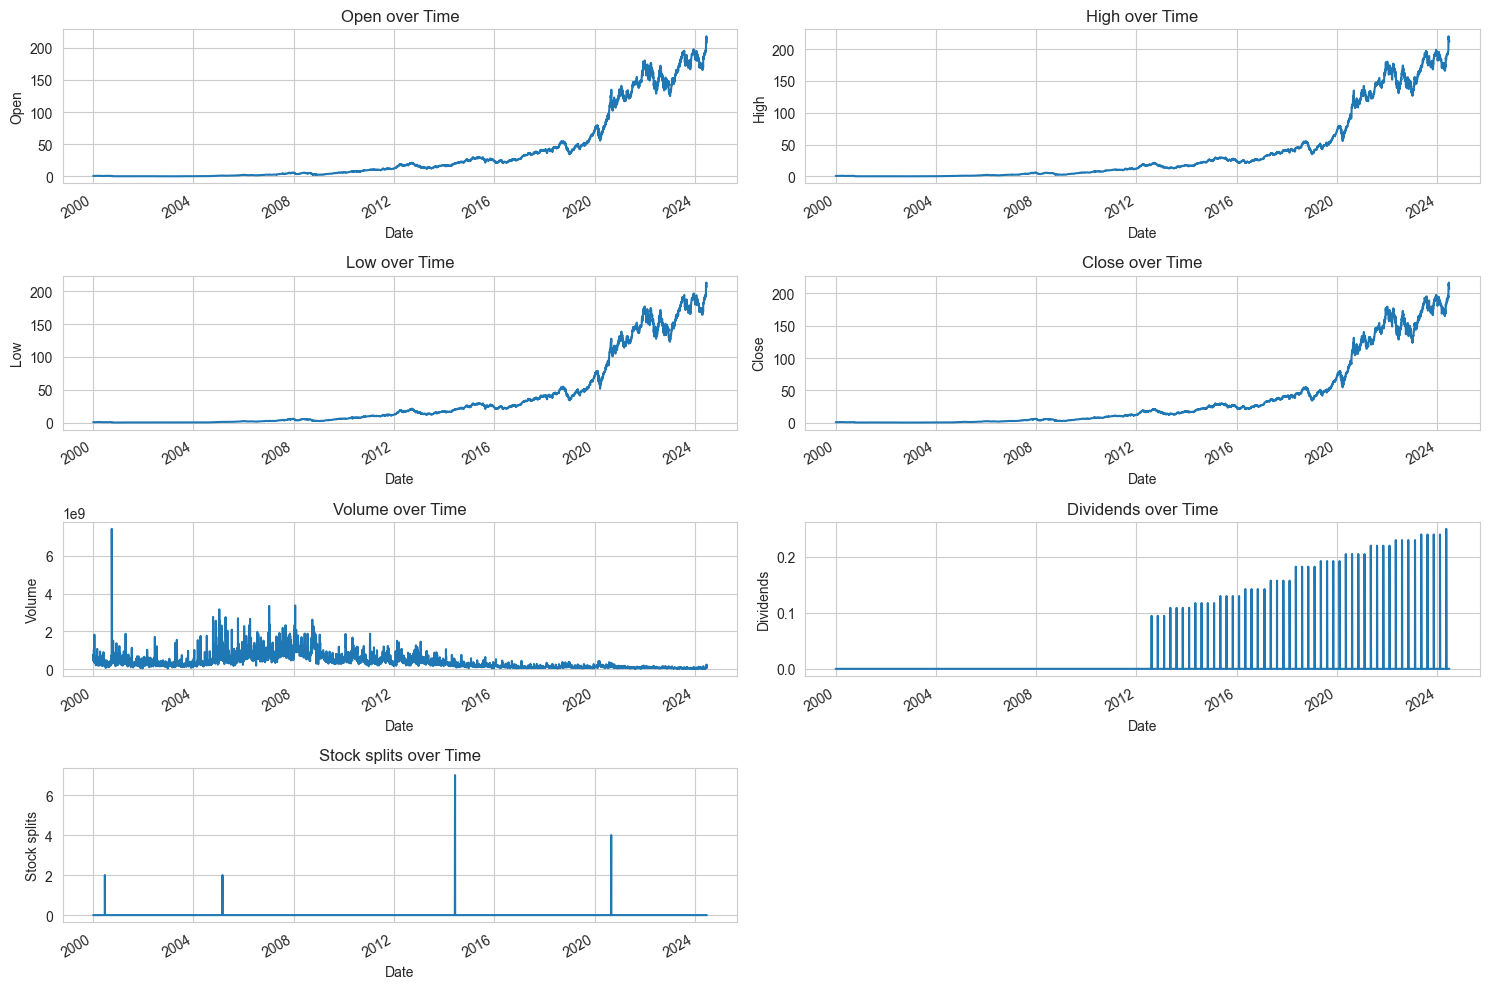

In [24]:
columns = df.describe().columns.to_list()

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten() 

for i, column in enumerate(columns):
    df[column].plot(ax=axes[i])
    axes[i].set_title(f'{column.capitalize()} over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column.capitalize())

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- For the `Open`, `Close`, `Low` and `High` the trends are showing an upward trend
- `Volume` had more variance __before 2016__ and since then it has been not that varied
- `Dividends` started after after the __start of 2012__ and has been growing consistently

## Plotting histograms for each metric

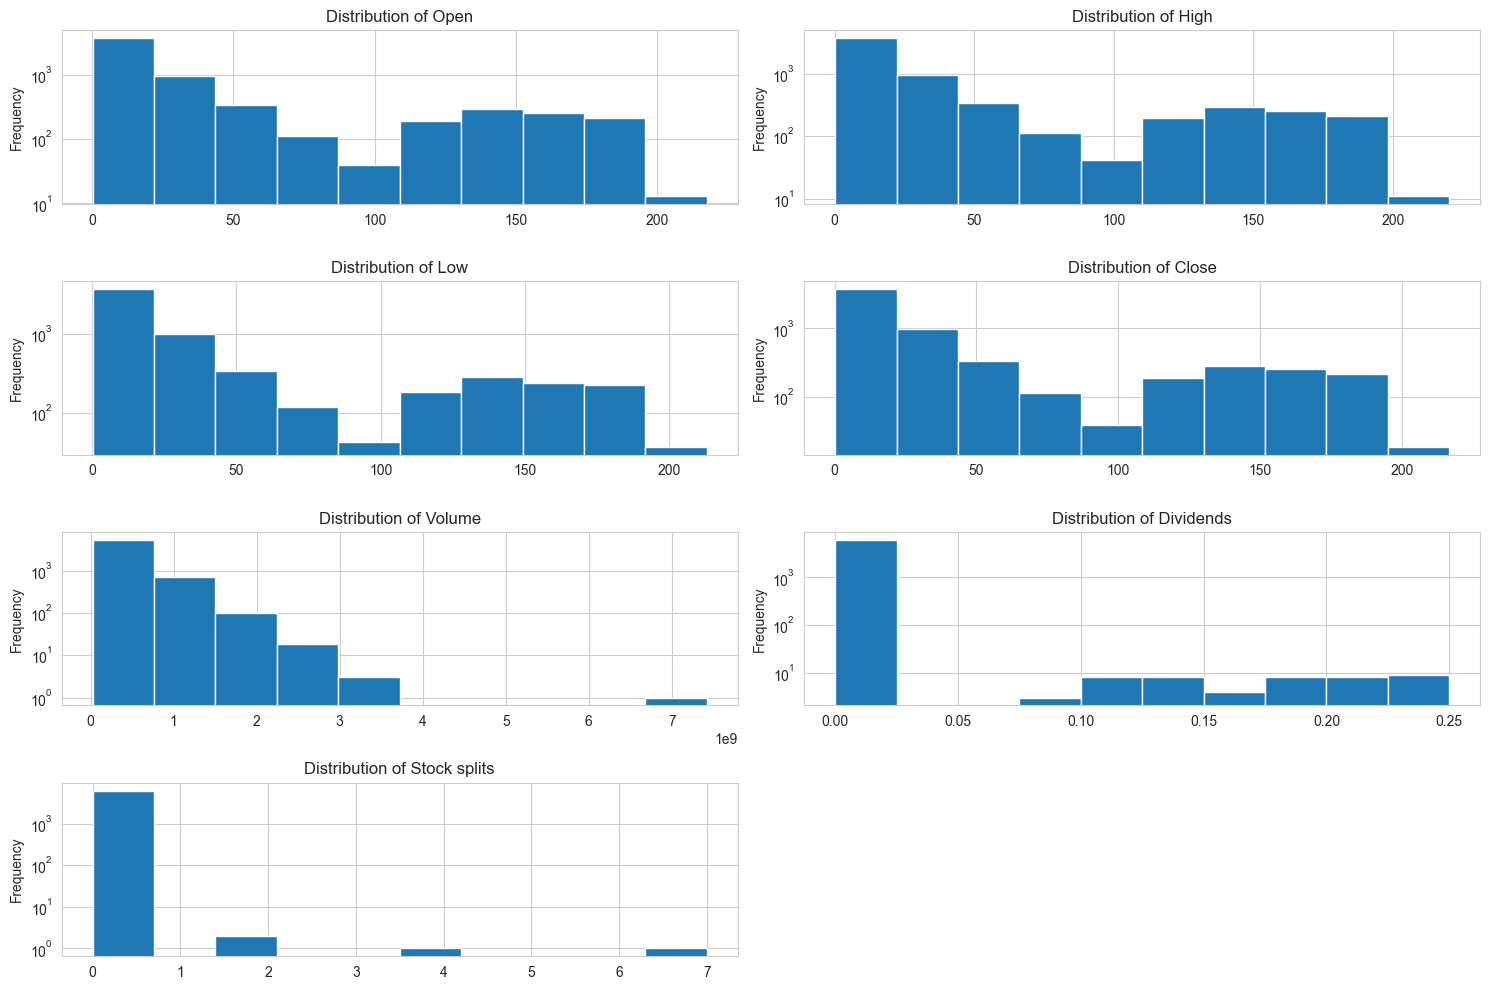

In [8]:
columns = df.describe().columns.to_list()

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten() 

for i, column in enumerate(columns):
    df[column].plot(kind='hist', ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_yscale('log')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Once again the distribution of `Open`, `Close`, `Low` and `High` are very similiar to each other.
- The volume appears to be right skewed with no values in __4,5 and 6 bins__

## Candle Stick Chart

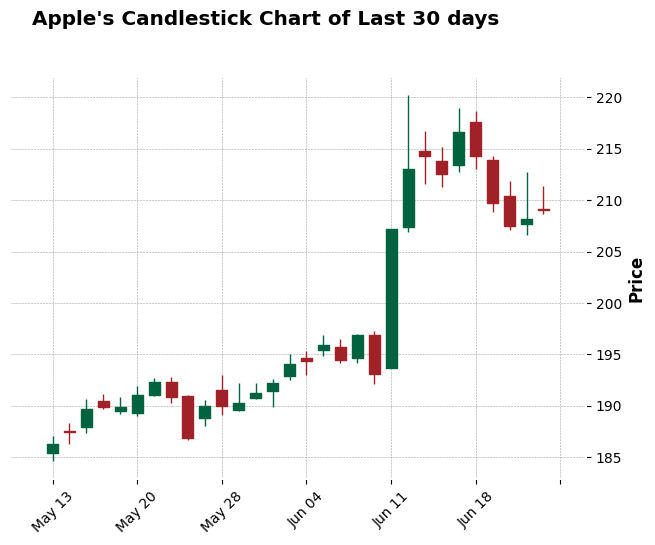

In [24]:
mpf.plot(df[-30:], type='candle', style='charles', title="Apple's Candlestick Chart of Last 30 days", ylabel='Price')

## Correlation heatmap plot

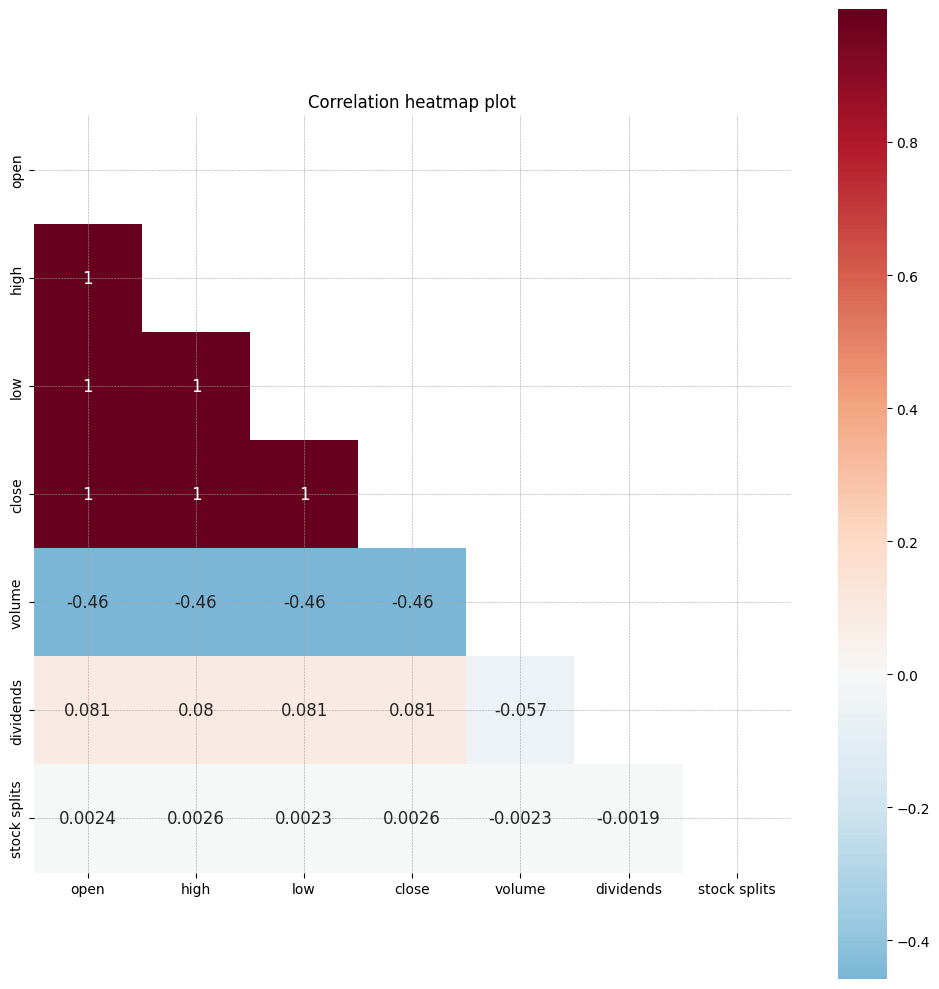

In [29]:
# Creating a heatmap correlation plot
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), mask=mask, cmap='RdBu_r', annot=True, 
            center=0, square=True, annot_kws={'size':12})
plt.title("Correlation heatmap plot")
plt.tight_layout()
plt.show()

In [40]:
# dropping dividend and stock split as we won't be needing them to predict the stock trend
df.shape
df = df.drop(columns=['dividends','stock splits'])
df.shape

(6158, 5)

In [41]:
df.sample(5)

open       high        low      close  \
Date                                                                    
2012-06-07 00:00:00-04:00  17.431126  17.432031  17.226104  17.262941   
2010-03-02 00:00:00-05:00   6.338783   6.365958   6.272656   6.306173   
2005-04-01 00:00:00-05:00   1.270896   1.273614   1.225001   1.234663   
2012-06-13 00:00:00-04:00  17.347486  17.467056  17.222479  17.276226   
2016-12-08 00:00:00-05:00  25.725159  26.089479  25.664825  26.017544   

                              volume  
Date                                  
2012-06-07 00:00:00-04:00  379766800  
2010-03-02 00:00:00-05:00  566546400  
2005-04-01 00:00:00-05:00  641284000  
2012-06-13 00:00:00-04:00  293580000  
2016-12-08 00:00:00-05:00  108273200

## Feature Engineering

In [42]:
# creating a column that stores the value of the closing price of the next day
df['tomorrow'] = df['close'].shift(-1)
df.head()

open      high       low     close     volume  \
Date                                                                           
2000-01-03 00:00:00-05:00  0.791669  0.849227  0.767607  0.844981  535796800   
2000-01-04 00:00:00-05:00  0.817145  0.835073  0.763833  0.773741  512377600   
2000-01-05 00:00:00-05:00  0.783176  0.834601  0.777515  0.785063  778321600   
2000-01-06 00:00:00-05:00  0.801105  0.807709  0.717125  0.717125  767972800   
2000-01-07 00:00:00-05:00  0.728448  0.762417  0.720900  0.751094  460734400   

                           tomorrow  
Date                                 
2000-01-03 00:00:00-05:00  0.773741  
2000-01-04 00:00:00-05:00  0.785063  
2000-01-05 00:00:00-05:00  0.717125  
2000-01-06 00:00:00-05:00  0.751094  
2000-01-07 00:00:00-05:00  0.737884

In [43]:
# creating a flag column that checks of the tomorrow price is greater than today (i.e. upwards trend) as 1 else (i.e. downwards trend) as 0
df['target'] = np.where(df['tomorrow'] > df['close'], 1, 0)
df.sample(5)

open        high         low       close  \
Date                                                                        
2002-07-25 00:00:00-04:00    0.225404    0.225705    0.211514    0.216799   
2020-08-06 00:00:00-04:00  107.823183  111.736967  107.229891  111.238892   
2000-11-02 00:00:00-05:00    0.318932    0.338748    0.317988    0.336861   
2012-02-10 00:00:00-05:00   14.824412   15.025508   14.751641   14.898690   
2021-02-04 00:00:00-05:00  133.582704  134.660766  131.906789  134.650970   

                              volume    tomorrow  target  
Date                                                      
2002-07-25 00:00:00-04:00  479354400    0.216496       0  
2020-08-06 00:00:00-04:00  202428800  108.709816       0  
2000-11-02 00:00:00-05:00  590693600    0.335916       0  
2012-02-10 00:00:00-05:00  631302000   15.175875       1  
2021-02-04 00:00:00-05:00   84183100  134.233841       0